In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
alldata = pd.read_csv('../data/medications.csv')

In [9]:
#data cleaning
alldata.drop(columns=['REASONCODE', 'REASONDESCRIPTION'], inplace= True)



In [ ]:
#analysis

#financial analysis
alldata['COVERAGE_RATIO'] = (alldata['PAYER_COVERAGE']/ alldata['BASE_COST'])*100

alldata.columns

In [ ]:
#insurance coverage plot

plt.figure(figsize=(8, 5), facecolor='#FFFAF6')
ax = sns.histplot(alldata['COVERAGE_RATIO'],bins=8,color="royalblue", stat='count')
ax.set_facecolor('#FFFAF6')

plt.xlabel("Insurance Coverage (%)", fontsize=12)
plt.ylabel("Prescription Count", fontsize=12)
plt.title("Insurance Coverage Distribution", fontsize=14, fontweight="bold")

for p in ax.patches:
    height = p.get_height()
    if height > 500:  
        plt.text(p.get_x() + p.get_width() / 2, height + 1,  
                 f"{int(height)}", ha="center", fontsize=8, fontweight="light")

sns.despine()
plt.savefig('../plots/insuranceCoverage.png')
plt.show()



In [ ]:
#highest cost meds
med_lookup = alldata[['CODE', 'DESCRIPTION']].drop_duplicates(subset=['CODE'])

highcost_meds_with_names = highcost_meds.merge(med_lookup, on='CODE', how='left')

prescription_counts = alldata.groupby('CODE', as_index=False)['CODE'].size()
prescription_counts.rename(columns={'size': 'PRESCRIBED'}, inplace=True)

final_table = highcost_meds_with_names.merge(prescription_counts, on='CODE', how='left')
final_table = final_table[['DESCRIPTION', 'BASE_COST', 'PRESCRIBED']]
final_table.rename(columns={'DESCRIPTION': 'MEDICINE NAME'}, inplace=True)

final_table = final_table.sort_values(by='BASE_COST', ascending=False)

In [ ]:
#finding meds that are and aren't insured

#80% and above
insured80 = alldata[alldata['COVERAGE_RATIO']> 79][['DESCRIPTION', 'BASE_COST']].drop_duplicates()

insured80.sort_values(by = ['BASE_COST'], ascending=False)

#20% and below
insured20 = alldata[alldata['COVERAGE_RATIO']< 21][['DESCRIPTION', 'BASE_COST']].drop_duplicates()

insured20.sort_values(by = ['BASE_COST'], ascending=False)

In [ ]:
plt.figure(figsize=(8, 6))

# Strip plot for <20% coverage
sns.stripplot(x=['<20% Coverage'] * len(insured20), y=insured20['BASE_COST'], jitter=True, alpha=0.6, color='skyblue')

# Strip plot for >80% coverage
sns.stripplot(x=['>80% Coverage'] * len(insured80), y=insured80['BASE_COST'], jitter=True, alpha=0.6, color='navy')

# Labels & Formatting
plt.title('Base Cost of Medicines by Coverage Ratio')
plt.xlabel('Coverage Group')
plt.ylabel('Base Cost')
plt.yscale('log')  

plt.savefig('../plots/costVscoverage.png')
plt.show()


In [ ]:
#finding all the instances of 1 patient (brute force)

patientID = '7e65bfa0-5e3b-3515-52aa-bfdef74ffd71'
patientData = alldata[alldata['PATIENT'] == patientID]

patientData

C:\Users\aditi\AppData\Local\Temp\ipykernel_4780\552256052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patientData['START'] = pd.to_datetime(patientData['START'])


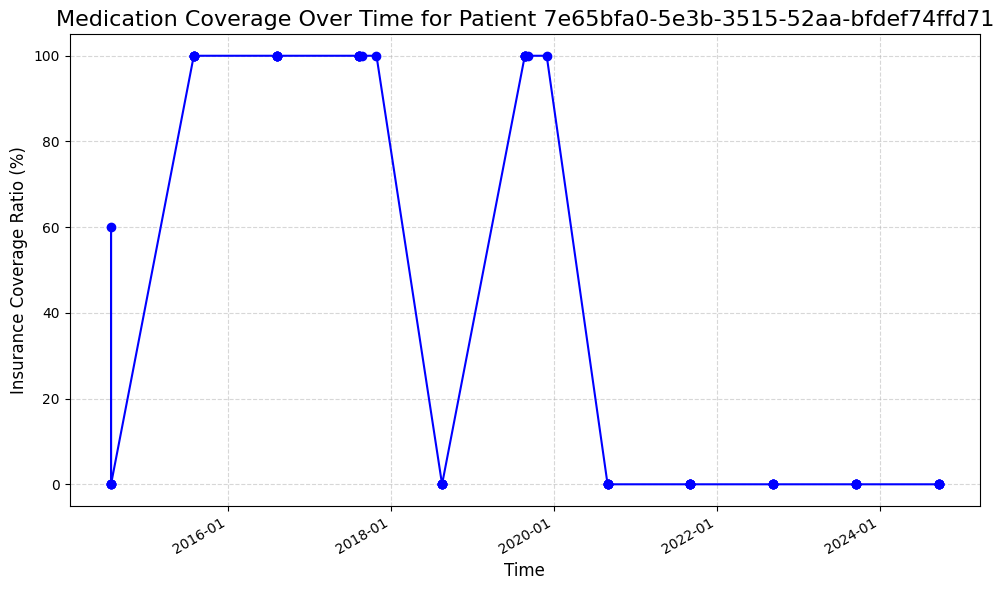

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Make sure 'START' is in datetime format
patientData['START'] = pd.to_datetime(patientData['START'])

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(patientData['START'], patientData['COVERAGE_RATIO'], marker='o', linestyle='-', color='b', markersize=6)

# Formatting the x-axis for better date readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format dates as Year
plt.gcf().autofmt_xdate()  

# Adding labels and title
plt.title(f"Medication Coverage Over Time for Patient {patientID}", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Insurance Coverage Ratio (%)", fontsize=12)

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.savefig('../plots/patient1Behaviour.png')
plt.show()
